In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # matri
import pandas as pd 
import json
import ast

In [2]:
PATH = "" # local folder

df_movie_orig = pd.read_csv(PATH + 'movies_metadata.csv')
df_credits_orig = pd.read_csv(PATH + "credits.csv")
df_keywords_orig = pd.read_csv(PATH+"keywords.csv")
df_links_orig = pd.read_csv(PATH+"links.csv")

C:\Users\danishNXT\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_movie = df_movie_orig.copy()
print("Metadata total : ", df_movie.columns)

df_credits = df_credits_orig.copy()
print("\ncredits ", df_credits.columns)

df_keywords = df_keywords_orig.copy()
print("Keywords: \n", df_keywords.columns)

df_links = df_links_orig.copy()
print("Links: \n", df_links.columns)

Metadata total :  Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

credits  Index(['cast', 'crew', 'id'], dtype='object')
Keywords: 
 Index(['id', 'keywords'], dtype='object')
Links: 
 Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')


In [4]:
df_movie = df_movie.drop(['belongs_to_collection', 'homepage', 'poster_path', 'tagline', 'video'], axis = 1)

In [5]:
df_movie.shape

(45466, 19)

In [6]:
# Checking  for all the null values in the dataset that we have to remove
df_movie.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
original_title            0
overview                954
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
vote_average              6
vote_count                6
dtype: int64

In [7]:
# changing id to numeric type

df_movie["id"] = pd.to_numeric(df_movie['id'], errors='coerce', downcast="integer")
df_movie.shape

(45466, 19)

In [8]:
df_movie = df_movie.dropna(subset=["imdb_id"])

In [9]:
print("df_credits",df_credits.shape)
df_credits.head(5) # we will be extracting the cast out of these rows

df_credits (45476, 3)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [10]:
#merge movie and credits dataset
df = df_movie.merge(df_credits,on=["id"],how="left")

In [11]:
df.head(5)
df.shape

(45525, 21)

In [12]:
#merging wih keywords dataset
df = df.merge(df_keywords,on=["id"],how="left")
df.shape

(46615, 22)

In [13]:
df = df.drop_duplicates()
df.shape

(45449, 22)

In [14]:
#dropping empty cast, crew, keywords
df.dropna(subset = ["cast","crew","keywords","popularity"], inplace=True)

In [15]:
df.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                952
popularity                0
production_companies      0
production_countries      0
release_date             81
revenue                   0
runtime                 255
spoken_languages          0
status                   81
title                     0
vote_average              0
vote_count                0
cast                      0
crew                      0
keywords                  0
dtype: int64

CAST CLEANING

In [16]:
#cleaning cast column
df['cast'] = df['cast'].apply(ast.literal_eval)

In [17]:
df['cast'][0][1]

{'cast_id': 15,
 'character': 'Buzz Lightyear (voice)',
 'credit_id': '52fe4284c3a36847f8024f99',
 'gender': 2,
 'id': 12898,
 'name': 'Tim Allen',
 'order': 1,
 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}

In [18]:
df['cast'] = df['cast'].apply(lambda r: [x['name'] for x in r]) # getting top 5 most billed actors

In [19]:
df['cast'] = df['cast'].apply(lambda r: r[:5])

In [20]:
df['cast'][0] # top billed actors!

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']

GENRE CLEANING

In [21]:
df['genres'] = df['genres'].apply(ast.literal_eval)

In [22]:
df['genres'] = df['genres'].apply(lambda r: [x['name'] for x in r]) # getting top 5 most billed actors

In [23]:
df['genres'][0]

['Animation', 'Comedy', 'Family']

LANGUAGE CLEANING

In [24]:
# include counts for how many are english and how many are not english -> convert to 1s and 0s

In [25]:
df['original_language'] = df['original_language'].apply(lambda lang: 1 if (lang == 'en') else 0 )

In [26]:
df['original_language']

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28       False
29       False
         ...  
46585     True
46586     True
46587    False
46588     True
46589     True
46590     True
46591     True
46592    False
46593    False
46594     True
46595     True
46596    False
46597    False
46598     True
46599    False
46600    False
46601     True
46602    False
46603     True
46604    False
46605     True
46606     True
46607     True
46608     True
46609     True
46610    False
46611    False
46612     True
46613     True
46614     True
Name: original_language, Length: 45442, dtype: bool

Overview Cleaning

In [27]:
# run sentiment analysis on this 
# we don't want to lose 1000 movies due to na data -> we're going to give them a neutral value that won't skew the results
# and will allow us to retain the movies and their other meta data for processing



In [28]:
df['overview'] = df['overview'].replace(np.nan, "")

In [29]:
df['overview'].isnull().sum()

0

During sentiment analysis now we can have a better resulting value for negative and positive value

In [31]:
df[df['revenue'].eq(0)]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew,keywords
2,False,0,"[Romance, Comedy]",15602.0,tt0113228,True,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
6,False,58000000,"[Comedy, Romance]",11860.0,tt0114319,True,Sabrina,An ugly duckling having undergone a remarkable...,6.67728,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Sabrina,6.2,141.0,"[Harrison Ford, Julia Ormond, Greg Kinnear, An...","[{'credit_id': '52fe44959251416c75039da9', 'de...","[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."
7,False,0,"[Action, Adventure, Drama, Family]",45325.0,tt0112302,True,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Tom and Huck,5.4,45.0,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",[]
11,False,0,"[Comedy, Horror]",12110.0,tt0112896,True,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.43033,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dracula: Dead and Loving It,5.7,210.0,"[Leslie Nielsen, Mel Brooks, Amy Yasbeck, Pete...","[{'credit_id': '52fe44b79251416c7503e7fb', 'de...","[{'id': 3633, 'name': 'dracula'}, {'id': 11931..."
21,False,0,"[Drama, Thriller]",1710.0,tt0112722,True,Copycat,An agoraphobic psychologist and a female detec...,10.7018,"[{'name': 'Regency Enterprises', 'id': 508}, {...",...,0.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Copycat,6.5,199.0,"[Sigourney Weaver, Holly Hunter, Will Patton, ...","[{'credit_id': '52fe430ec3a36847f803722d', 'de...","[{'id': 796, 'name': 'police brutality'}, {'id..."
23,False,0,"[Drama, Fantasy, Science Fiction, Thriller]",12665.0,tt0114168,True,Powder,Harassed by classmates who won't accept his sh...,12.1331,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...",...,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Powder,6.3,143.0,"[Mary Steenburgen, Sean Patrick Flanery, Lance...","[{'credit_id': '52fe45129251416c7504ab67', 'de...","[{'id': 7345, 'name': 'dead animal'}, {'id': 1..."
25,False,0,[Drama],16420.0,tt0114057,True,Othello,The evil Iago pretends to be friend of Othello...,1.8459,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,0.0,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Othello,7.0,33.0,"[Laurence Fishburne, Irène Jacob, Kenneth Bran...","[{'credit_id': '5462510ec3a368082d000121', 'de...","[{'id': 497, 'name': 'shakespeare'}, {'id': 93..."
27,False,0,"[Drama, Romance]",17015.0,tt0114117,True,Persuasion,This film adaptation of Jane Austen's last nov...,2.22843,"[{'name': 'BBC Films', 'id': 288}]",...,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Persuasion,7.4,36.0,"[Amanda Root, Ciarán Hinds, Susan Fleetwood, F...","[{'credit_id': '52fe46ff9251416c7508a8b3', 'de...","[{'id': 1316, 'name': 'captain'}, {'id': 33384..."
29,False,0,"[Drama, Crime]",37557.0,tt0115012,False,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,1.10091,"[{'name': 'Ministère des Affaires Étrangères',...",...,0.0,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,Shanghai Triad,6.5,17.0,"[Gong Li, Li Bao-Tian, Wang Xiaoxiao, Li Xueji...","[{'credit_id': '52fe46559251416c910511c9', 'de...","[{'id': 964, 'name': 'servant'}, {'id': 2311, ..."
32,False,0,"[Romance, Adve

Popularity Cleaning

In [57]:
df['popularity']

0         21.9469
1         17.0155
2         11.7129
3         3.85949
4         8.38752
5         17.9249
6         6.67728
7         2.56116
8         5.23158
9          14.686
10        6.31844
11        5.43033
12        12.1407
13          5.092
14        7.28448
15        10.1374
16        10.6732
17        9.02659
18        8.20545
19        7.33791
20        12.6696
21        10.7018
22        11.0659
23        12.1331
24         10.332
25         1.8459
26        8.68132
27        2.22843
28        9.82242
29        1.10091
           ...   
46585    1.270832
46586    20.82178
46587    0.590087
46588    0.143223
46589    0.767762
46590    4.392389
46591     0.21926
46592    1.618458
46593    0.208349
46594    0.148131
46595    0.725084
46596    0.213973
46597    0.071782
46598    2.568495
46599    1.109068
46600    0.225432
46601    0.011025
46602    1.559596
46603    0.139936
46604    0.225051
46605    0.222814
46606    0.076061
46607     0.38645
46608    0.661558
46609    5

In [16]:
data[data['budget'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
11067,Superman Returns,270000000.0,3.910812e+08,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2017
16130,Tangled,260000000.0,5.917949e+08,2010
18685,John Carter,260000000.0,2.841391e+08,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,2013


In [17]:
data[data['revenue'].notnull()][['title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)

,title,budget,revenue,year
14551,Avatar,237000000.0,2.787965e+09,2009
26555,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,Titanic,200000000.0,1.845034e+09,1997
17818,The Avengers,220000000.0,1.519558e+09,2012
25084,Jurassic World,150000000.0,1.513529e+09,2015
28830,Furious 7,190000000.0,1.506249e+09,2015
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,Frozen,150000000.0,1.274219e+09,2013
42222,Beauty and the Beast,160000000.0,1.262886e+09,2017


In [14]:
data = df_movie
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity'] = data['popularity'].replace(0, np.nan)

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['budget'] = data['budget'].replace(0, np.nan)

data['revenue'] = data['revenue'].replace(0, np.nan)

#Extracting Only year in release_date to make it simpler
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

data['runtime'] = data['runtime'].astype('float')
data['vote_average'] = data['vote_average'].astype('float')
data['vote_count'] = data['vote_count'].astype('float')

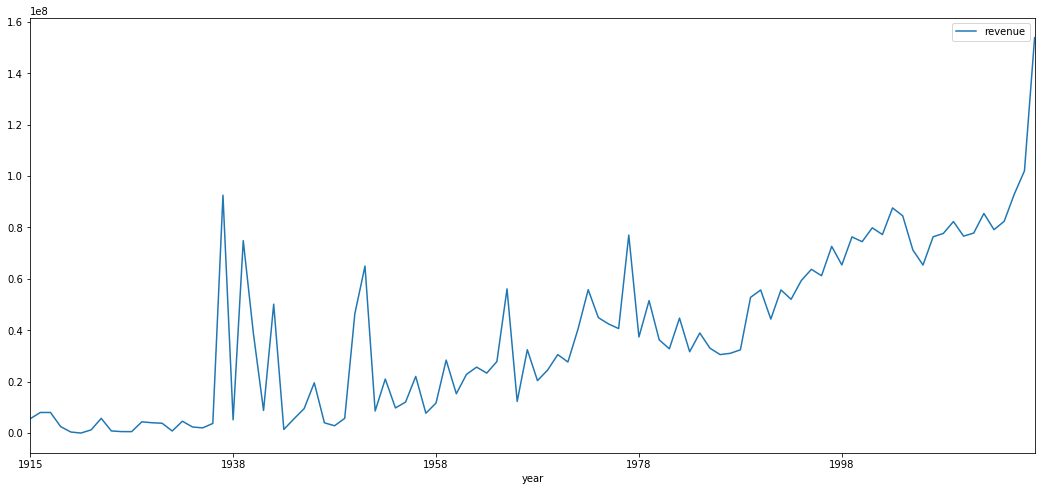

In [40]:
year_rev = (data[data['revenue'].notnull()][['year','revenue']].groupby('year').mean())[:-1]
year_rev.plot(figsize=(18,8))
plt.show()

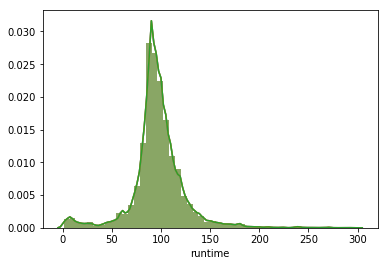

In [25]:
sns.distplot(data[(data['runtime'] < 300) & (data['runtime'] > 0)]['runtime'])
plt.show()